### Import

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use('ggplot') 

from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score

### Load Data

In [191]:
dmf = pd.read_csv('data/yun_data/output/covid_socio_2020.csv')
unemp_covid_df = pd.read_csv('data/yun_data/output/unemployment_covid_2020.csv')
covid_df = pd.read_csv('data/yun_data/output/covid_monthly_2020.csv')
df3 = pd.read_csv('data/yun_data/output/unemp_rate_2020.csv')
df4 = pd.read_csv('data/yun_data/output/cov_unemp_summary.csv')

### Modeling : 

In [192]:
dmf.columns

Index(['Name', 'Postal Code', 'Area size', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio',
       'Testing_Rate', 'deaths_per_population', 'recovered_per_population',
       'confirmed_per_population', 'active_per_population', 'unemp_year_rate'],
      dtype='object')

### Clustering Kmeans -  n_clusters = 2

In [193]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=2)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k2_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k2_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0
 1 0 1 0 1 0 0 1 1 1 1 0 1 1]
Location of centroids: 
[[-0.15712838  0.04455238  0.09200743 -0.37555133 -0.23870529  0.37102786
   0.22889151 -0.62036503  0.83615258 -0.71852174 -0.63485174  0.78577525
   0.45374261  0.01706028 -0.03721614  0.56330268  0.58425333  0.57518259
   0.5948093   0.51372615  0.43478415]
 [ 0.13966967 -0.03960212 -0.08178439  0.3338234   0.21218248 -0.32980254
  -0.20345912  0.55143558 -0.74324674  0.63868599  0.56431266 -0.69846689
  -0.40332676 -0.01516469  0.03308101 -0.5007135  -0.51933629 -0.51127342
  -0.52871938 -0.45664547 -0.3864748 ]]


In [194]:
#create third column
dmf['k2_labels'] = k2_labels

dmf.k2_labels.value_counts()

1    27
0    24
Name: k2_labels, dtype: int64

In [195]:
# Compute the silouette score and visually examine the results.
round(silhouette_score(X_sc, k2_labels),2)

0.21

### Clustering Kmeans -  n_clusters = 3

In [196]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=3)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k3_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k3_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [0 1 0 0 2 1 1 1 1 2 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 2 0 1 0 0
 1 0 1 0 1 0 2 1 1 1 1 0 1 1]
Location of centroids: 
[[-0.17283661  0.10531008  0.10759997 -0.40941539 -0.15965267  0.42339474
  -0.09491228 -0.8350976   0.70432432 -0.89749017 -0.82403798  0.89734221
   0.36785561 -0.21903003  0.20220318  0.17488121  0.14334408  0.13455952
   0.1577733   0.05201718 -0.04206802]
 [ 0.13966967 -0.03960212 -0.08178439  0.3338234   0.21218248 -0.32980254
  -0.20345912  0.55143558 -0.74324674  0.63868599  0.56431266 -0.69846689
  -0.40332676 -0.01516469  0.03308101 -0.5007135  -0.51933629 -0.51127342
  -0.52871938 -0.45664547 -0.3864748 ]
 [-0.0785872  -0.2592361   0.01404475 -0.20623099 -0.63396841  0.10919345
   1.84791048  0.45329784  1.4952939   0.17632039  0.31107943  0.22794045
   0.88317757  1.1975118  -1.23431271  2.50541004  2.78879955  2.77829794
   2.77998928  2.822271    2.81904497]]


In [197]:
#create third column
dmf['k3_labels'] = k3_labels
dmf.k3_labels.value_counts()

1    27
0    20
2     4
Name: k3_labels, dtype: int64

In [198]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k3_labels),2)

0.21

### Clustering Kmeans -  n_clusters = 4

In [199]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=4)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k4_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k4_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [1 2 1 1 3 2 2 2 0 3 1 2 2 1 1 2 2 1 1 2 2 2 1 2 1 1 2 2 1 2 2 1 3 1 2 1 1
 2 1 2 1 2 1 3 2 2 2 2 1 2 2]
Location of centroids: 
[[ 6.99811498 -2.24426494 -1.4331376  -2.35759523 -2.68745764  3.23010325
  -0.08713321  0.46140096 -0.66531184  1.85620808  2.41876974  0.50135807
  -1.58809912 -0.6800167  -4.47820668 -1.03278595 -0.783428   -0.74417735
  -0.79048899 -0.72985508 -0.59417797]
 [-0.17283661  0.10531008  0.10759997 -0.40941539 -0.15965267  0.42339474
  -0.09491228 -0.8350976   0.70432432 -0.89749017 -0.82403798  0.89734221
   0.36785561 -0.21903003  0.20220318  0.17488121  0.14334408  0.13455952
   0.1577733   0.05201718 -0.04206802]
 [-0.12411669  0.04519261 -0.02980926  0.4373395   0.3237071  -0.46672199
  -0.2079332   0.55489845 -0.74624423  0.59185822  0.49298739 -0.74461401
  -0.35775859  0.01040654  0.20659208 -0.48024917 -0.50917892 -0.50231557
  -0.51865131 -0.44613741 -0.37848621]
 [-0.0785872  -0.2592361   0.01404475 -0.20623099 -0.6339

In [200]:
#create third column
dmf['k4_labels'] = k4_labels
dmf.k4_labels.value_counts()

2    26
1    20
3     4
0     1
Name: k4_labels, dtype: int64

In [201]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k4_labels),2)

0.23

### Clustering Kmeans -  n_clusters = 6

In [202]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=6)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k6_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k6_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [4 2 4 4 5 3 3 3 1 0 0 3 2 0 0 2 2 4 4 2 3 3 0 3 4 0 2 2 4 3 3 4 0 0 2 0 4
 3 0 3 4 2 4 5 3 2 3 3 4 2 2]
Location of centroids: 
[[-0.10605919  0.1577448  -0.1876837  -0.51698361 -0.1733426   0.43230493
  -0.10269135 -0.1155409   0.2064456  -0.2123595  -0.34868606  0.19965587
   0.11019463 -0.16713086 -0.01497668  0.70039716  0.96945196  0.89355052
   1.01439538  1.05009972  0.83873108]
 [ 6.99811498 -2.24426494 -1.4331376  -2.35759523 -2.68745764  3.23010325
  -0.08713321  0.46140096 -0.66531184  1.85620808  2.41876974  0.50135807
  -1.58809912 -0.6800167  -4.47820668 -1.03278595 -0.783428   -0.74417735
  -0.79048899 -0.72985508 -0.59417797]
 [-0.23856408  0.19020439  0.28204148  1.03877146  0.86991046 -0.82950243
  -0.51984399  0.0103275  -1.04420068  0.21749411 -0.22833229 -0.48860228
   0.01620509 -0.57316548  0.45742018 -0.48209096 -0.68839524 -0.65124479
  -0.71599848 -0.67406282 -0.62460018]
 [-0.02601892 -0.07910321 -0.2971099  -0.0781736  -0.1444

In [203]:
#create third column
dmf['k6_labels'] = k6_labels
dmf.k6_labels.value_counts()

3    14
4    12
2    12
0    10
5     2
1     1
Name: k6_labels, dtype: int64

In [204]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k3_labels),2)

0.21

### Clustering Kmeans -  n_clusters = 8

In [205]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=8)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k8_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k8_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [3 5 1 3 2 7 7 0 4 2 1 7 5 1 1 0 5 3 3 0 7 7 1 7 3 1 0 5 1 0 7 3 2 1 5 1 3
 7 1 7 3 5 1 6 5 0 7 7 3 0 5]
Location of centroids: 
[[-1.80510174e-01  1.12297176e+00 -9.82067778e-01  4.98837956e-02
   9.01834450e-01 -5.91227540e-01 -7.06680584e-01  9.09727978e-02
  -9.98125648e-01  4.25715482e-01 -7.14615916e-02 -6.08475031e-01
  -6.66723830e-01 -9.76583335e-01  7.93531851e-01 -5.72016108e-01
  -6.61184739e-01 -6.77886568e-01 -6.68580806e-01 -6.20865616e-01
  -5.87472687e-01]
 [-1.47493986e-01 -2.88411011e-02  3.39783897e-02 -2.82289325e-01
  -9.88166776e-02  2.85052382e-01 -1.64143926e-02 -2.01581259e-01
   3.11657708e-01 -4.04603336e-01 -4.43919175e-01  2.51082382e-01
   2.76959773e-01 -1.41597587e-01  3.43823808e-02  3.97069049e-01
   4.60746084e-01  4.70585609e-01  4.95994663e-01  4.47950468e-01
   2.75811798e-01]
 [-4.34034384e-02  3.19210458e-01 -5.36566718e-01 -3.65591308e-01
  -7.76236295e-01  1.22480572e-01  1.57240175e+00  5.69442503e-01
   1.30115

In [206]:
#create third column
dmf['k8_labels'] = k8_labels
dmf.k8_labels.value_counts()

7    11
1    11
3     9
5     8
0     7
2     3
6     1
4     1
Name: k8_labels, dtype: int64

In [207]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k8_labels),2)

0.16

### Clustering Kmeans -  n_clusters = 10

In [208]:
# Data for clustering
X = dmf[['Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]

#fit the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

model = KMeans(n_clusters=10)
model.fit(X_sc)

# Get the labels and centroids for our first clustering model
k10_labels = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", k10_labels)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [6 5 1 6 8 9 9 0 3 4 1 9 5 4 1 0 5 6 6 0 9 9 1 9 6 1 0 5 1 0 9 6 4 1 5 4 1
 0 4 0 6 5 1 2 7 0 9 9 6 0 5]
Location of centroids: 
[[-1.41276471e-01  9.90596871e-01 -1.03033039e+00 -2.03106282e-02
   8.19132456e-01 -5.94502796e-01 -4.92293115e-01  2.48919249e-01
  -7.94739435e-01  3.95913553e-01  1.67870532e-02 -5.62980255e-01
  -7.16625228e-01 -7.47858738e-01  4.72757736e-01 -6.17769435e-01
  -6.60367988e-01 -6.68779801e-01 -6.82161899e-01 -6.03822635e-01
  -5.38099296e-01]
 [-1.77228092e-01 -1.69070570e-01  2.49557028e-01 -1.79670942e-01
  -1.48110180e-01  2.65251969e-01  4.68396625e-02 -3.12896792e-01
   5.03711551e-01 -5.73956244e-01 -6.01033821e-01  4.30122830e-01
   7.45434282e-01 -4.90857123e-02 -2.41792125e-02  1.77249791e-01
   1.35104220e-01  1.96260644e-01  2.15226685e-01  7.85415598e-02
   1.14140311e-02]
 [-1.84138483e-01 -1.99457578e+00  1.66587915e+00  2.71849947e-01
  -2.07164772e-01  6.93320955e-02  2.67443669e+00  1.04863854e-01
   2.07771

In [209]:
#create third column
dmf['k10_labels'] = k10_labels
dmf.k10_labels.value_counts()

9    9
1    9
0    9
6    8
5    7
4    5
8    1
7    1
3    1
2    1
Name: k10_labels, dtype: int64

In [210]:
# Compute the silouette score and visually examine the results of the 8 clusters.
round(silhouette_score(X_sc, k10_labels),2)

0.16

### Result

n_cluster = 4 is the best so far, with the silhouette score 0.23

In [221]:
dmf[['Name','k4_labels']].sort_values('k4_labels')

,Name,k4_labels
8,District of Columbia,0
0,Alabama,1
48,West Virginia,1
42,Tennessee,1
40,South Carolina,1
38,Pennsylvania,1
36,Oklahoma,1
35,Ohio,1
33,North Carolina,1
31,New Mexico,1


In [222]:
dmf[dmf['k4_labels']== 0]['Name'].values

array(['District of Columbia'], dtype=object)

In [223]:
dmf[dmf['k4_labels']== 1]['Name'].values

array(['Alabama', 'Arizona', 'Arkansas', 'Georgia', 'Illinois', 'Indiana',
       'Kentucky', 'Louisiana', 'Michigan', 'Mississippi', 'Missouri',
       'Nevada', 'New Mexico', 'North Carolina', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'South Carolina', 'Tennessee', 'West Virginia'],
      dtype=object)

In [224]:
dmf[dmf['k4_labels']== 2]['Name'].values

array(['Alaska', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho',
       'Iowa', 'Kansas', 'Maine', 'Maryland', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey',
       'North Dakota', 'Oregon', 'Rhode Island', 'South Dakota', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [225]:
dmf[dmf['k4_labels']== 3]['Name'].values

array(['California', 'Florida', 'New York', 'Texas'], dtype=object)

### Social Features

<ipython-input-230-49dd45106377>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k4['k4_labels']=k4_labels
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate

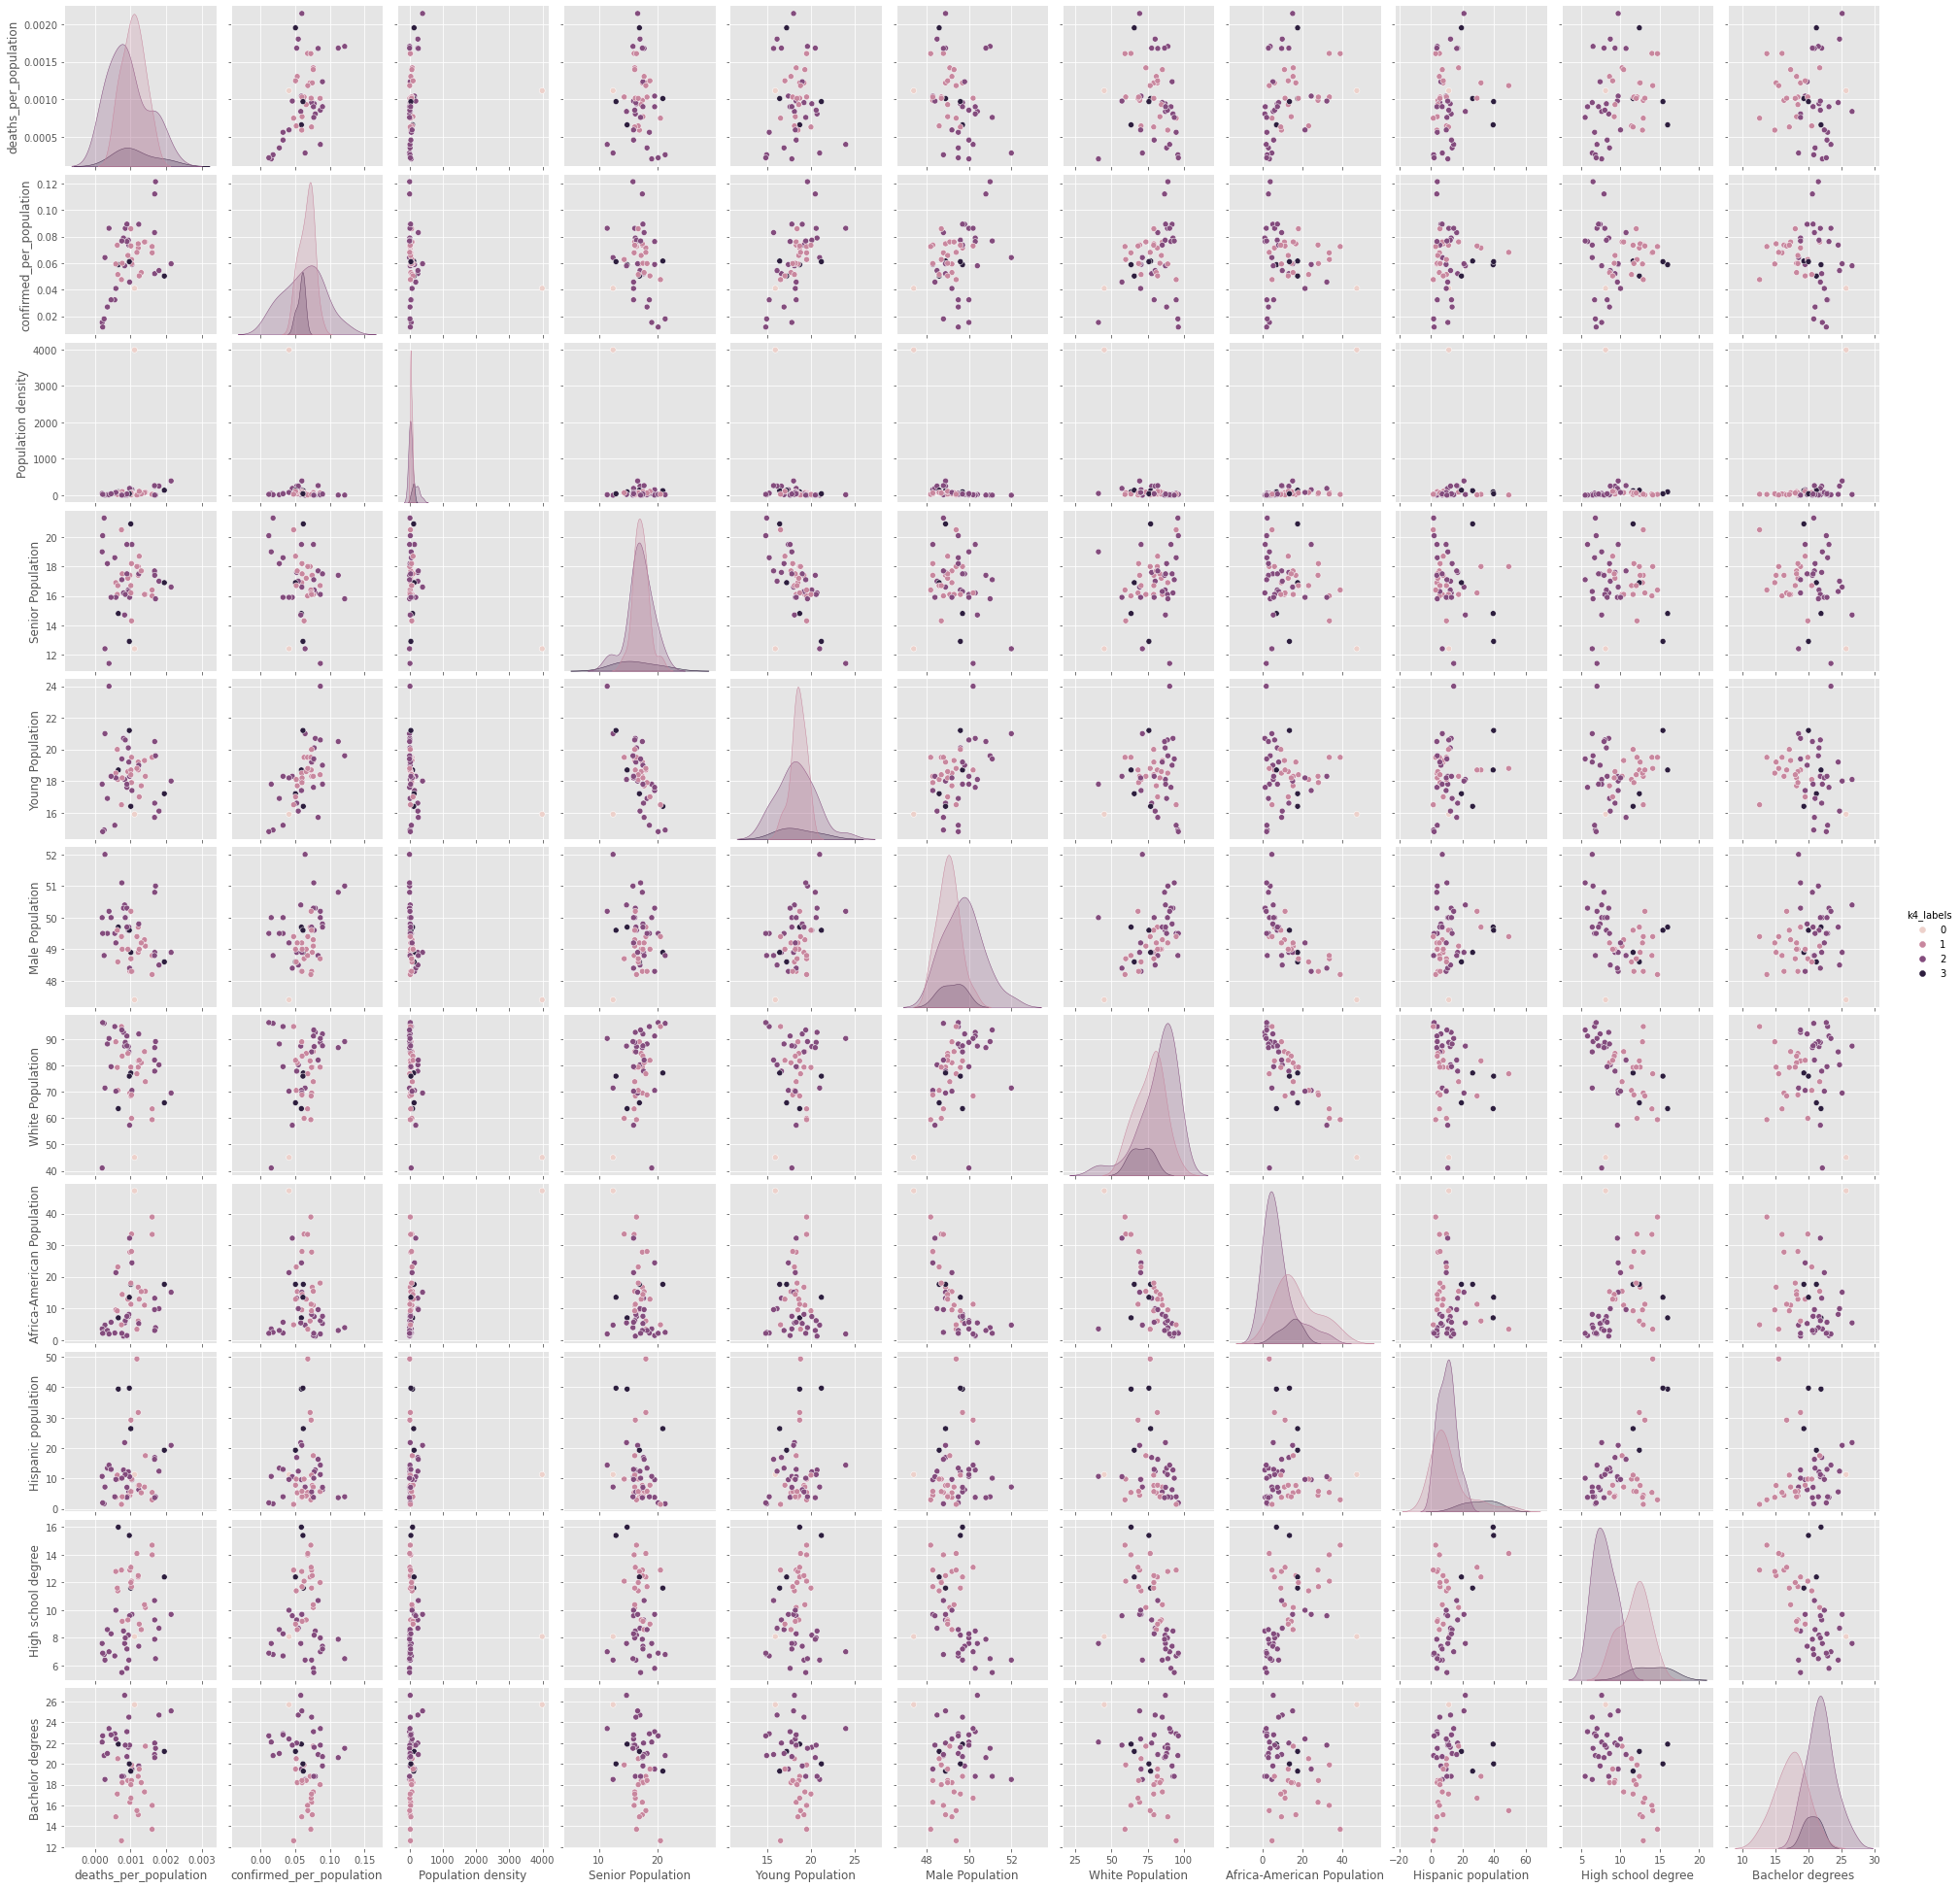

In [230]:
# visually examine the cluster that have been created
k4 = dmf[['deaths_per_population','confirmed_per_population','Population density','Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
       'Hispanic population','High school degree',
       'Bachelor degrees']]
k4['k4_labels']=k4_labels

sns.pairplot(data=k4, hue='k4_labels');

### Economic Features

<ipython-input-229-187a87dde5f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k4['k4_labels']=k4_labels
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate

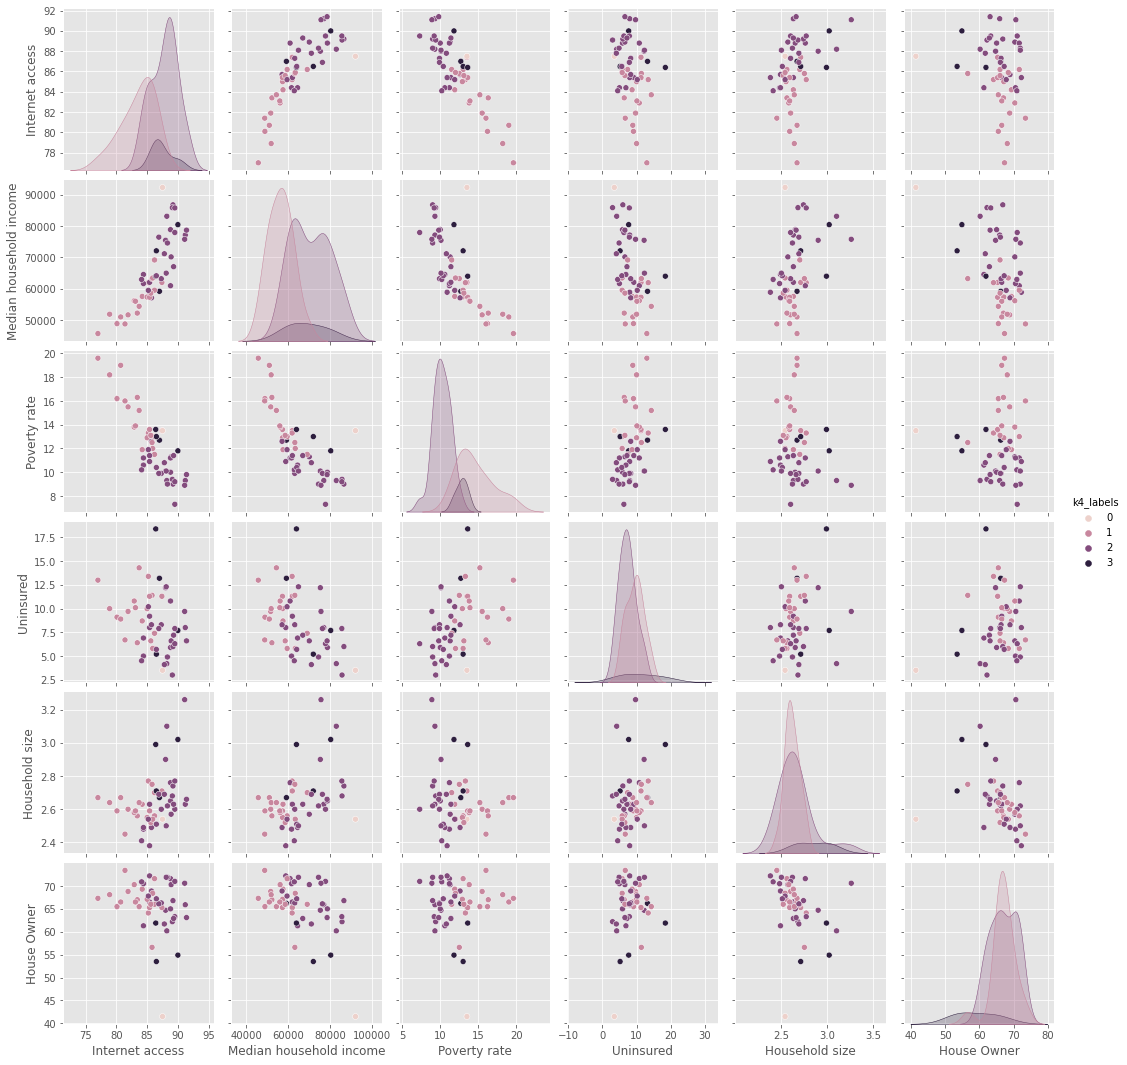

In [229]:
# visually examine the cluster that have been created
k4 = dmf[['deaths_per_population','confirmed_per_population','Internet access', 'Median household income', 'Poverty rate',
       'Uninsured', 'Household size', 'House Owner']]
k4['k4_labels']=k4_labels

sns.pairplot(data=k4, hue='k4_labels');

### Medical Features

<ipython-input-231-36fc27ec8be5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k4['k4_labels']=k4_labels
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate

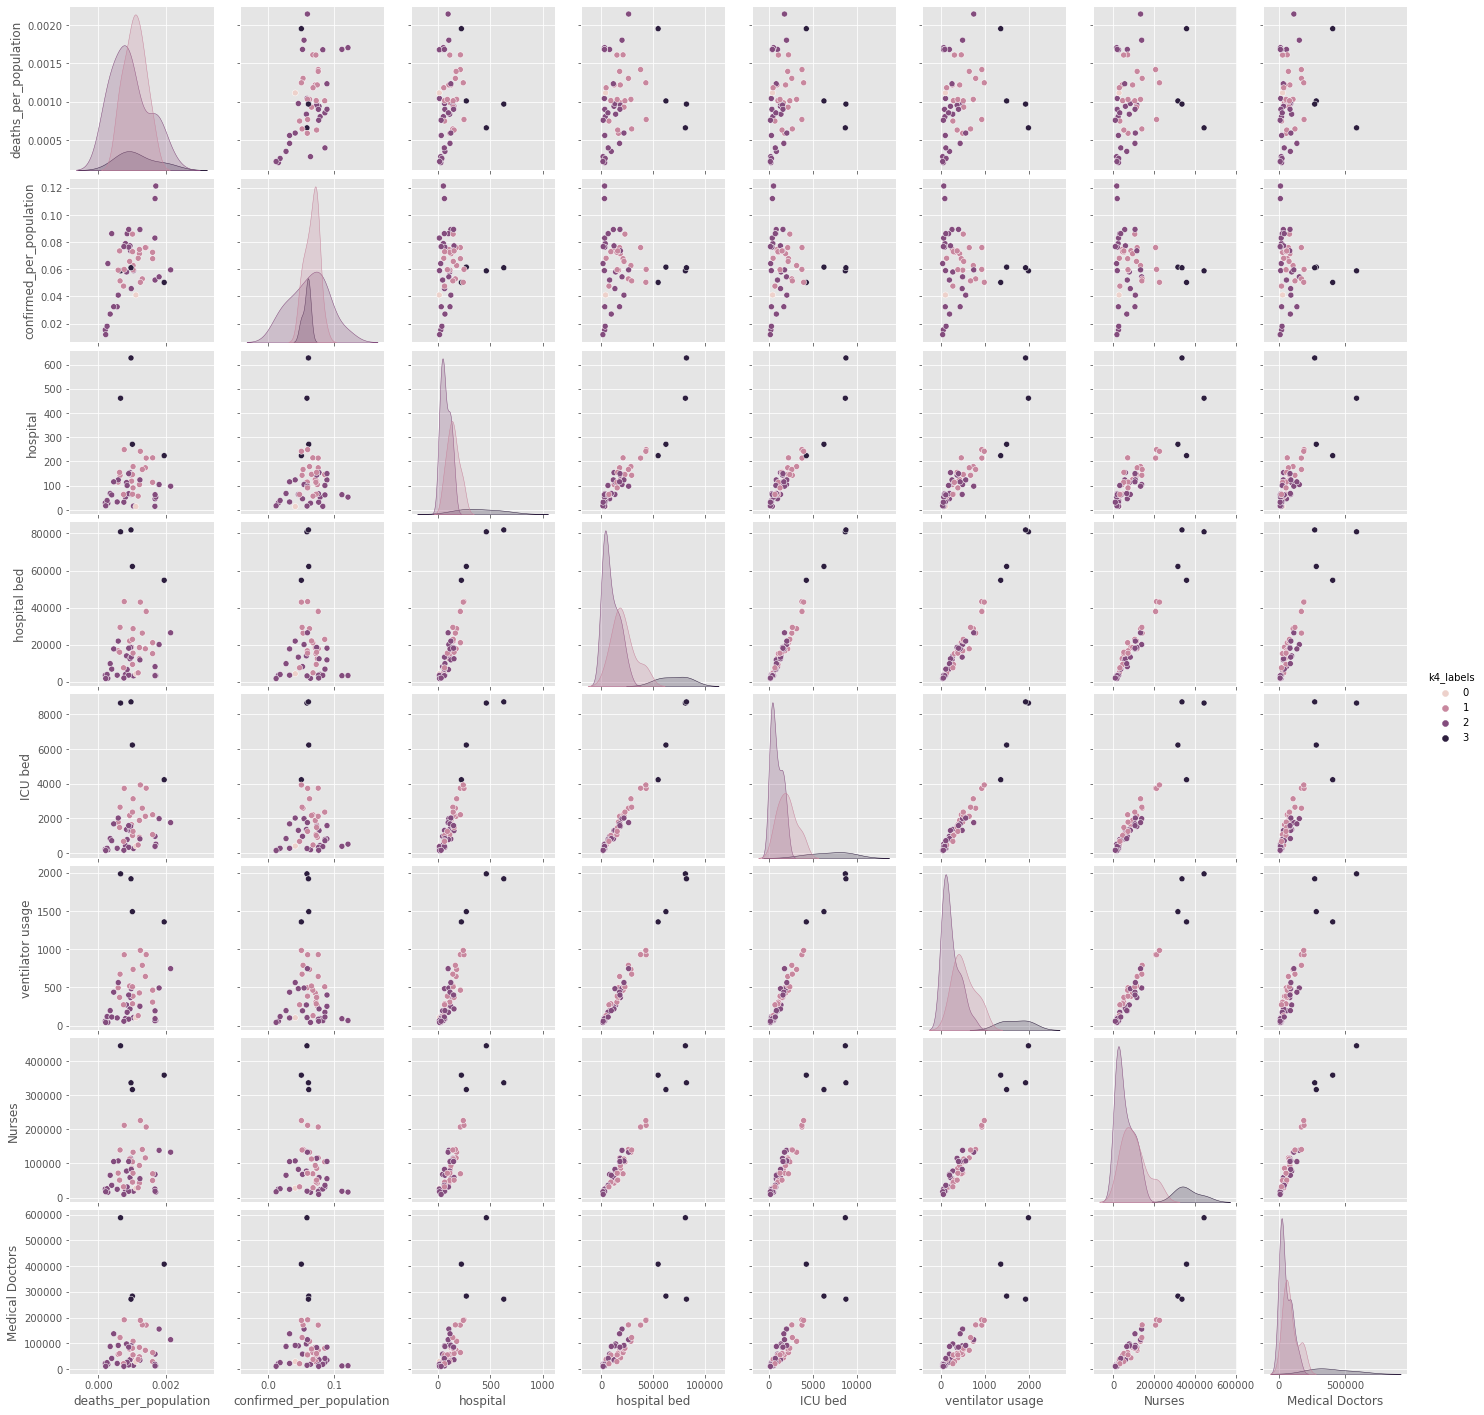

In [231]:
# visually examine the cluster that have been created
k4 = dmf[['deaths_per_population','confirmed_per_population','hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']]
k4['k4_labels']=k4_labels

sns.pairplot(data=k4, hue='k4_labels');